## Análise Fatorial PCA
### Naime Andere

#### Project: Analise Atlas São Paulo

Content: https://naime-andere.notion.site/Unsupervised-Machine-Learning-An-lise-Fatorial-e-PCA-be9a43fe565a46d3ba021575fd18073d?pvs=4

Linkedin: https://www.linkedin.com/in/naimeandere/ 

Github: https://github.com/NaimeAndere

##### Instalando os pacotes

In [51]:
!pip install pandas
!pip install numpy
!pip install factor_analyzer
!pip install sympy
!pip install scipy
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install pingouin
!pip install pyshp

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


##### Importando os pacotes

In [52]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers.default = 'browser'
import plotly.graph_objects as go
import shapefile as shp


Importando o banco de dados

In [6]:
atlas = pd.read_excel("atlas_ambiental.xlsx")

Informações sobre as variáveis

In [7]:
# Informações gerais sobre o DataFrame

print(atlas.info())

# Estatísticas descritiva das variáveis

tab_desc = atlas.drop(columns=['cód_ibge']).describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cód_ibge      96 non-null     int64  
 1   distritos     96 non-null     object 
 2   renda         96 non-null     int64  
 3   quota         96 non-null     float64
 4   escolaridade  96 non-null     float64
 5   idade         96 non-null     int64  
 6   mortalidade   96 non-null     float64
 7   txcresc       96 non-null     float64
 8   causasext     96 non-null     float64
 9   favel         96 non-null     float64
 10  denspop       96 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 8.4+ KB
None


Separando somente as variáveis quantitativas do banco de dados

In [8]:
atlas_pca = atlas.drop(columns=['cód_ibge', 'distritos'])

Matriz de correlações entre as variáveis

In [9]:
corr = atlas_pca.corr()

Gráfico interativo

In [10]:
fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.4f}',
        colorscale='viridis'))

fig.update_layout(
    height = 700,
    width = 700,
    yaxis=dict(autorange="reversed"))

fig.show()

Teste de Esfericidade de Bartlett

In [11]:
bartlett, p_value = calculate_bartlett_sphericity(atlas_pca)

print(f'Qui² Bartlett: {round(bartlett, 2)}')
print(f'p-valor: {round(p_value, 4)}')

Qui² Bartlett: 748.16
p-valor: 0.0


Definindo a PCA (procedimento inicial com todos os fatores possíveis)

In [12]:
fa = FactorAnalyzer(n_factors=9, method='principal', rotation=None).fit(atlas_pca)

Obtendo os eigenvalues (autovalores)

In [13]:
autovalores = fa.get_eigenvalues()[0]

print(autovalores)

[4.95603069 1.16433814 0.99635412 0.72406663 0.52930223 0.39832415
 0.12966871 0.06506649 0.03684884]


Parametrizando a PCA para os fatores derivados de autovalores > 1

In [14]:
fa = FactorAnalyzer(n_factors=2, method='principal', rotation=None).fit(atlas_pca)

Eigenvalues, variâncias e variâncias acumuladas

In [15]:
autovalores_fatores = fa.get_factor_variance()

tabela_eigen = pd.DataFrame(autovalores_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

print(tabela_eigen)

         Autovalor  Variância  Variância Acumulada
Fator 1   4.956031   0.550670             0.550670
Fator 2   1.164338   0.129371             0.680041


Gráfico da variância acumulada dos componentes principais

C:\Users\naime\AppData\Local\Temp\ipykernel_19512\3171429748.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




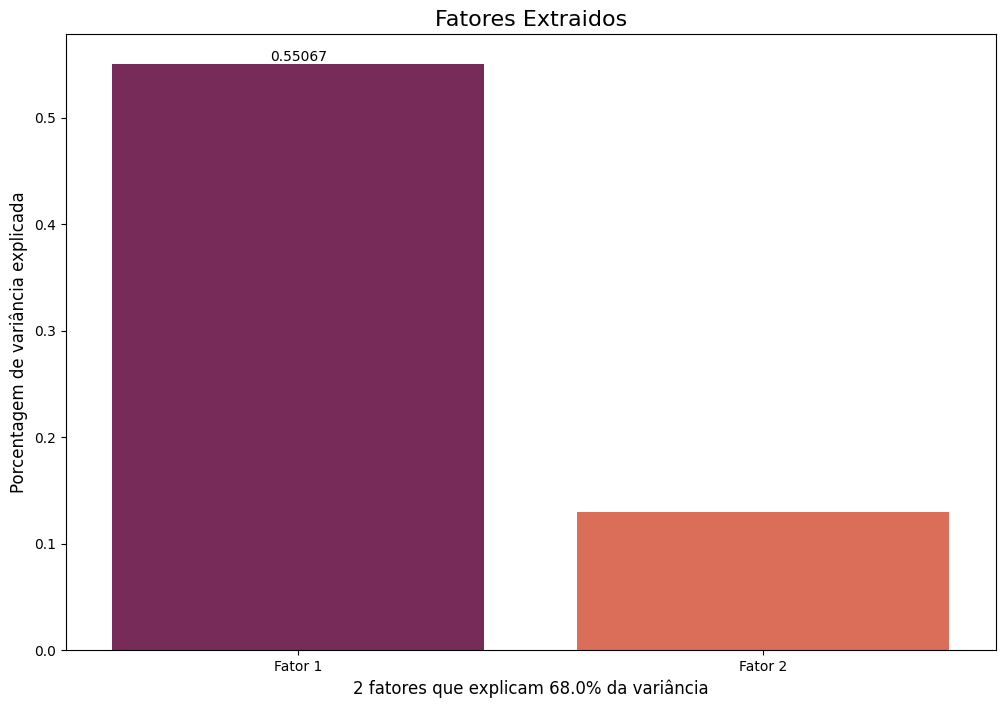

In [16]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=tabela_eigen.index, y=tabela_eigen['Variância'], data=tabela_eigen, palette='rocket')
ax.bar_label(ax.containers[0])
plt.title("Fatores Extraidos", fontsize=16)
plt.xlabel(f"{tabela_eigen.shape[0]} fatores que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=12)
plt.ylabel("Porcentagem de variância explicada", fontsize=12)
plt.show()


Determinando as cargas fatoriais

In [17]:
cargas_fatoriais = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatoriais)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = atlas_pca.columns

print(tabela_cargas)

               Fator 1   Fator 2
renda         0.832127  0.368971
quota         0.900606  0.226453
escolaridade  0.966543 -0.024594
idade         0.960135 -0.065447
mortalidade  -0.655699 -0.176634
txcresc      -0.696781  0.337446
causasext    -0.666578 -0.043910
favel        -0.457185  0.442840
denspop       0.166281 -0.793048


Gráfico das cargas fatoriais (loading plot)

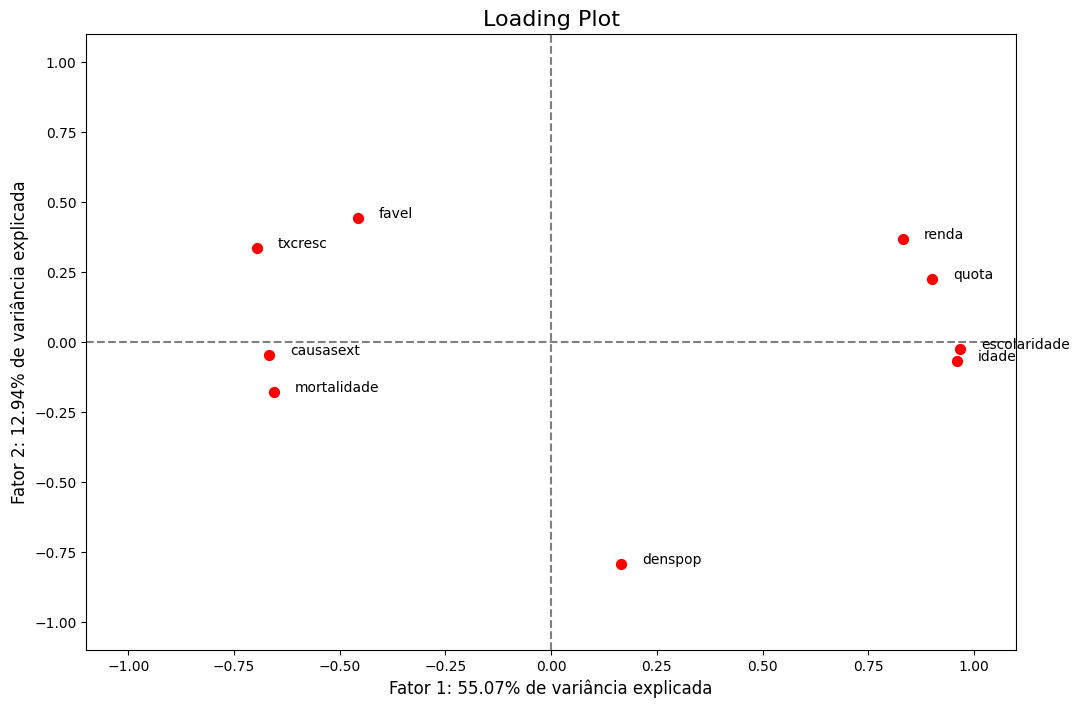

In [18]:
plt.figure(figsize=(12,8))
tabela_cargas_chart = tabela_cargas.reset_index()
plt.scatter(tabela_cargas_chart['Fator 1'], tabela_cargas_chart['Fator 2'], s=50, color='red')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.05, point['y'], point['val'])

label_point(x = tabela_cargas_chart['Fator 1'],
            y = tabela_cargas_chart['Fator 2'],
            val = tabela_cargas_chart['index'],
            ax = plt.gca()) 

plt.axhline(y=0, color='grey', ls='--')
plt.axvline(x=0, color='grey', ls='--')
plt.ylim([-1.1,1.1])
plt.xlim([-1.1,1.1])
plt.title("Loading Plot", fontsize=16)
plt.xlabel(f"Fator 1: {round(tabela_eigen.iloc[0]['Variância']*100,2)}% de variância explicada", fontsize=12)
plt.ylabel(f"Fator 2: {round(tabela_eigen.iloc[1]['Variância']*100,2)}% de variância explicada", fontsize=12)
plt.show()

Determinando as comunalidades

In [19]:
comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = atlas_pca.columns

print(tabela_comunalidades)

              Comunalidades
renda              0.828575
quota              0.862372
escolaridade       0.934811
idade              0.926143
mortalidade        0.461141
txcresc            0.599374
causasext          0.446254
favel              0.405126
denspop            0.656574


Extração dos fatores para as observações do banco de dados

In [21]:
fatores = pd.DataFrame(fa.transform(atlas_pca))
fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(fatores.columns)]

# Adicionando os fatores ao banco de dados

atlas = pd.concat([atlas.reset_index(drop=True), fatores], axis=1)
print(atlas)

    cód_ibge          distritos  renda      quota  escolaridade  idade  \
0          1          Água Rasa   1961  34.619999           7.6     32   
1          2  Alto de Pinheiros   4180  75.959999           8.4     33   
2          3         Anhanguera   1093   4.500000           5.8     23   
3          4         Aricanduva   1311  21.020000           6.8     27   
4          5        Artur Alvim   1248  15.910000           7.0     27   
..       ...                ...    ...        ...           ...    ...   
91        92      Vila Medeiros   1405  19.760000           6.8     27   
92        93      Vila Prudente   1755  32.080002           7.2     30   
93        94         Vila Sônia   2970  41.410000           7.4     27   
94        95       São Domingos   2047  23.510000           6.8     26   
95        96            Lajeado    775   8.490000           5.4     21   

    mortalidade    txcresc   causasext  favel     denspop   Fator 1   Fator 2  \
0         13.86  -1.840000   5

Identificando os scores fatoriais

In [30]:
scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = atlas_pca.columns

print(tabela_scores)

               Fator 1   Fator 2
renda         0.167902  0.316893
quota         0.181719  0.194491
escolaridade  0.195024 -0.021122
idade         0.193731 -0.056210
mortalidade  -0.132303 -0.151703
txcresc      -0.140593  0.289818
causasext    -0.134498 -0.037712
favel        -0.092248  0.380336
denspop       0.033551 -0.681115


Considere que o primeiro fator seja adequado para o ranking de distritos

In [31]:
# Note que adotamos um critério distinto da "soma ponderada"

dados_mapa = atlas[['cód_ibge', 'distritos', 'Fator 1']].sort_values(by=['cód_ibge'], ascending = True).reset_index(drop=True)
print (dados_mapa)

    cód_ibge          distritos   Fator 1   Fator 1
0          1          Água Rasa  0.682371  0.682371
1          2  Alto de Pinheiros  1.790304  1.790304
2          3         Anhanguera -1.204379 -1.204379
3          4         Aricanduva -0.257928 -0.257928
4          5        Artur Alvim -0.205284 -0.205284
..       ...                ...       ...       ...
91        92      Vila Medeiros -0.099947 -0.099947
92        93      Vila Prudente  0.292861  0.292861
93        94         Vila Sônia  0.203269  0.203269
94        95       São Domingos -0.117800 -0.117800
95        96            Lajeado -1.289226 -1.289226

[96 rows x 4 columns]


Importando o mapa da cidade de São Paulo

In [37]:
sf = shp.Reader("DEINFO_DISTRITO")

def read_shapefile(sf):
    fields = [x[0] for x in sf.fields][1:]
    records = [y[:] for y in sf.records()]
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

dist = read_shapefile(sf)

# Fonte: http://dados.prefeitura.sp.gov.br/dataset/distritos

Organizando o banco de dados das coordenadas

In [44]:
dist['COD_DIST'] = pd.to_numeric(dist['COD_DIST'])
dist = dist.sort_values(by=['COD_DIST'], ascending = True).reset_index(drop=True)
print (dist)

    CLASSID     FEATID  REVISIONNU          NOME_DIST SIGLA_DIST  COD_DIST  \
0       4.0  8583441.0         1.0          AGUA RASA        ARA         1   
1       4.0  8583442.0         1.0  ALTO DE PINHEIROS        API         2   
2       4.0  8583443.0         1.0         ANHANGUERA        ANH         3   
3       4.0  8583444.0         1.0         ARICANDUVA        ARI         4   
4       4.0  8583445.0         1.0        ARTUR ALVIM        AAL         5   
..      ...        ...         ...                ...        ...       ...   
91      4.0  8583436.0         1.0      VILA MEDEIROS        VMD        92   
92      4.0  8583437.0         1.0      VILA PRUDENTE        VPR        93   
93      4.0  8583440.0         1.0         VILA SONIA        VSO        94   
94      4.0  8583415.0         1.0       SAO DOMINGOS        SDO        95   
95      4.0  8583486.0         1.0            LAJEADO        LAJ        96   

   COD_SUB  DATA_CRIAC  USUARIO_ID  \
0       25  2007-03-19   

Gerando o mapa da cidade de SP com distritos delimitados

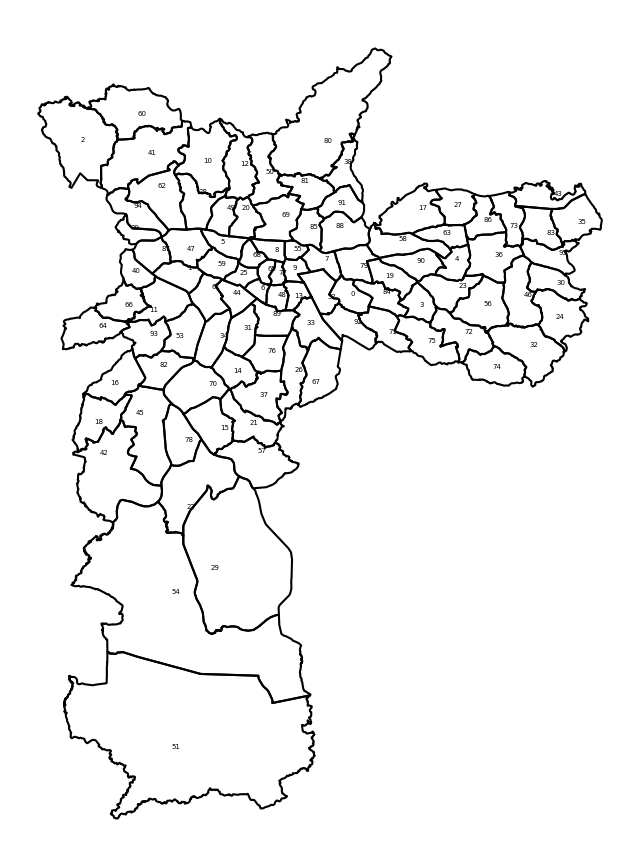

In [53]:
def plot_map(df, x_lim = None, y_lim = None, figsize = (8,11)):
    
    plt.figure(figsize = figsize)
    id=0
    for coordinates in df.coords:
        x = [i[0] for i in coordinates]
        y = [i[1] for i in coordinates]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=5)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
    plt.axis('off')

plot_map(dist)

# Referência: https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f

Definindo as cores 

In [54]:
# Vamos dividir os valores do fator em 6 faixas

def calc_color(data):
        new_data = pd.qcut(data, 6, labels=list(range(6)))
        paleta = sns.color_palette('YlOrBr', n_colors=6)
        color_sq = paleta.as_hex()
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val])
        return color_ton

Plotando o mapa com as cores

In [55]:
def plot_map_fill_multiples_ids_3(df, title, distrito_id, color_ton, x_lim = None, y_lim = None, figsize = (8,11)):
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)

    for coordinates in df.coords:
        x = [i[0] for i in coordinates]
        y = [i[1] for i in coordinates]
        plt.plot(x, y, 'k')
            
    for id in distrito_id:
        shape_ex = df.coords[id]
        x_lon = np.zeros((len(shape_ex),1))
        y_lat = np.zeros((len(shape_ex),1))
        for ip in range(len(shape_ex)):
            x_lon[ip] = shape_ex[ip][0]
            y_lat[ip] = shape_ex[ip][1]
        ax.fill(x_lon,y_lat,  color_ton[distrito_id.index(id)]);
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=6)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
    
    plt.axis('off')
        
distritos = list(np.arange(96)) # id_distritos
data = list(dados_mapa['Fator 1']) # indicador socioeconômico (fator)
color_ton = calc_color(data) # tonalidade de cores
plot_map_fill_multiples_ids_3(dist, 'Indicador Socioeconômico', distritos, color_ton)


TypeError: unsupported operand type(s) for -: 'str' and 'str'